In [1]:
from dypac import dypac
import numpy as np
import sklearn as sk
import scipy as sp
import matplotlib.pyplot as plt
import time
from nilearn import datasets
from nilearn import image
from nilearn.input_data import NiftiMasker
from nilearn import plotting
from nilearn.decomposition import DictLearning, CanICA
from scipy.stats import pearsonr

In [2]:
adhd_dataset = datasets.fetch_adhd(n_subjects=1)
epi_filename = adhd_dataset.func[0]

In [16]:
model = dypac(n_clusters=7, n_states=3, verbose=1, n_init=5, n_init_aggregation=20, n_replications=200, 
                      detrend=True, smoothing_fwhm=5, standardize=True)
stab_maps = model.fit(epi_filename)

[MultiNiftiMasker.fit] Loading data from [/home/pbellec/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz]
[MultiNiftiMasker.fit] Computing mask
[MultiNiftiMasker.transform] Resampling mask
[dypac] Loading data
[MultiNiftiMasker.transform_single_imgs] Loading data from Nifti1Image('/home/pbellec/nilearn_data/adhd/data/0010042/0010042_rest_tshift_RPI_voreg_mni.nii.gz')
[MultiNiftiMasker.transform_single_imgs] Smoothing images
[MultiNiftiMasker.transform_single_imgs] Extracting region signals
[MultiNiftiMasker.transform_single_imgs] Cleaning extracted signals


/home/pbellec/git/nilearn/nilearn/plotting/js_plotting_utils.py:123: UserWarning: It seems you have created more than 10 nilearn views. As each view uses dozens of megabytes of RAM, you might want to delete some of them.
  MAX_IMG_VIEWS_BEFORE_WARNING))



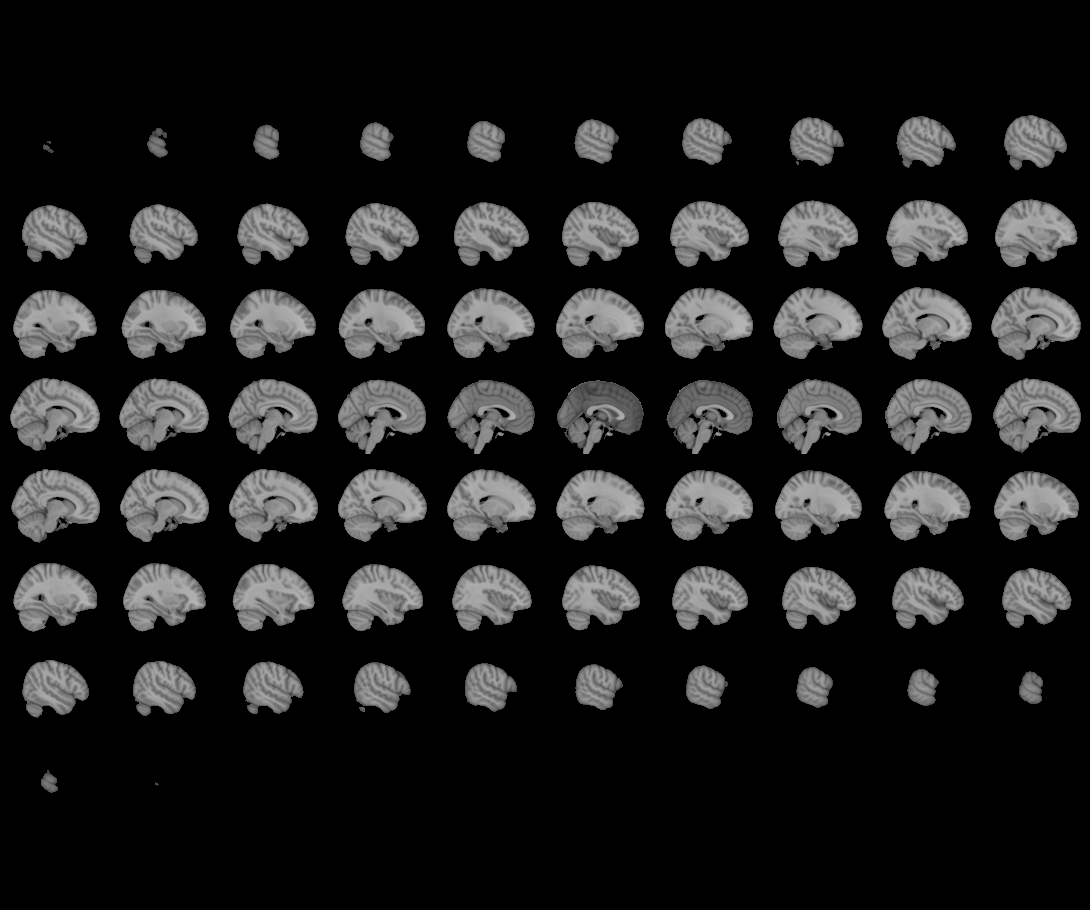
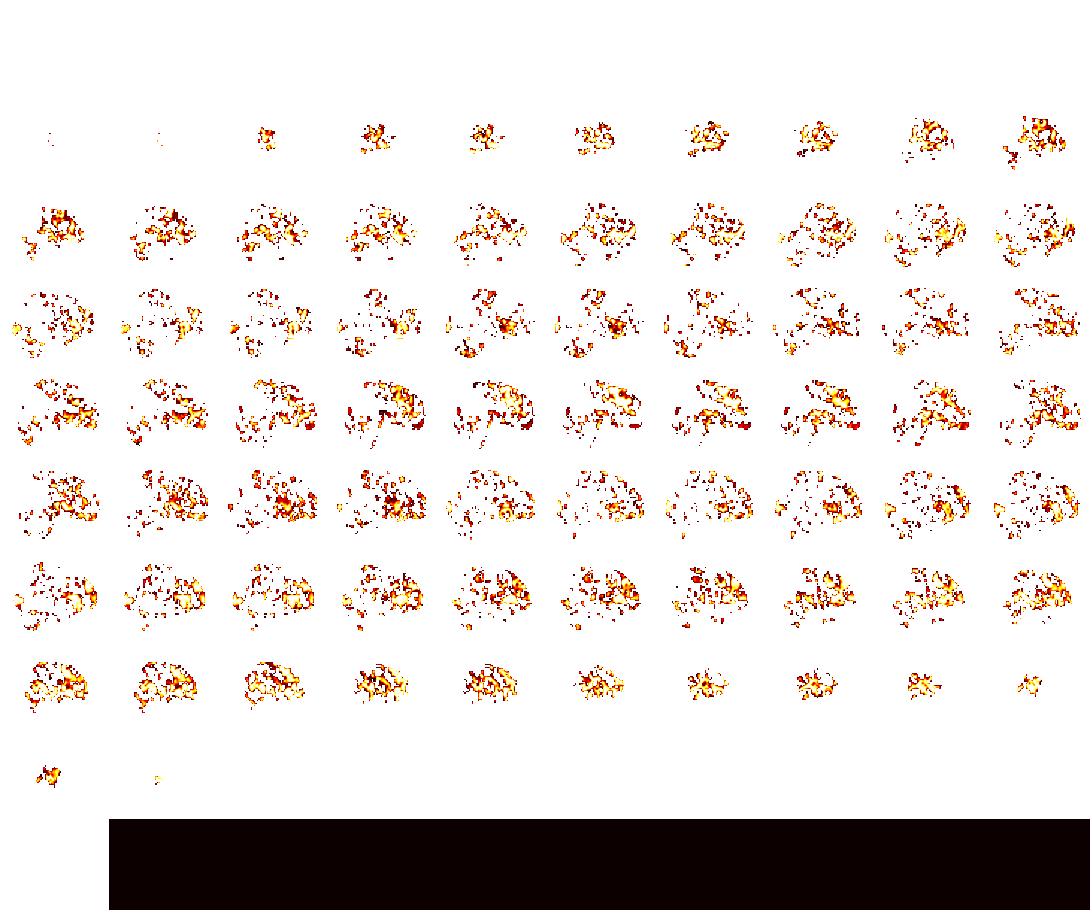

In [43]:
num_comp = 20
comp = model.masker_.inverse_transform(model.components_[num_comp,:])
plotting.view_img(comp, threshold=0.1, vmax=1)

In [23]:
model.dwell_time_[0][0]

0.32

In [ ]:
masker = NiftiMasker(mask_strategy='epi', detrend=True, standardize=True, smoothing_fwhm=5)
masker.fit(epi_filename)

In [ ]:
y = masker.transform(epi_filename)
y.shape

In [ ]:
t0 = time.clock()
stab_maps, dwell_time = sca.recursive_cluster(y.transpose(), n_clusters=10, subsample_size=50, n_states=3,
                                              n_replications=40, max_iter=30, contiguous=True, n_jobs=-1,
                                              n_init=10, threshold_dice=0.5, threshold_stability=0.3)
print(time.clock()-t0, "seconds process time")

In [ ]:
stab_maps_img = masker.inverse_transform(stab_maps.transpose())
dwell_time

In [ ]:
ind = 13
rsn = image.index_img(stab_maps_img, ind)
plotting.view_img(rsn, symmetric_cmap=True, vmax=1, threshold=0.2, title=('dwelltime'+str(dwell_time[ind])))

In [ ]:
canica = CanICA(n_components=20,
                 memory="nilearn_cache", memory_level=2,
                 verbose=1,
                 random_state=0,
                 mask_strategy='template',
                 detrend=True,
                 smoothing_fwhm=5)

In [ ]:
t0 = time.clock()
canica.fit(epi_filename)
print(time.clock()-t0, "seconds process time")

In [ ]:
ind = 9
rsn = image.index_img(canica.components_img_, ind)
plotting.view_img(rsn, symmetric_cmap=True, title=('dwelltime'+str(dwell_time[ind])))